# Extreme Fill 2D Example

In [1]:
from extremefill2D.fextreme import init_sim, restart_sim
from extremefill2D.fextreme.plot import vega_plot_treant
import vega
from extremefill2D.fextreme.tools import get_by_uuid

In [2]:
treant = init_sim('scripts/params.json', 'data', tags=['debug'])

In [3]:
treant = restart_sim(treant, 10)

In [4]:
# NBVAL_IGNORE_OUTPUT
treant.uuid

'ca94901e-3048-4f55-8f34-9ecac7a48c78'

In [5]:
# from extremefill2D.fextreme.tools import get_by_uuid
# treant = get_by_uuid('8de55c11')

In [7]:
out = vega_plot_treant(treant)

In [8]:
type(out) is vega.Vega

True

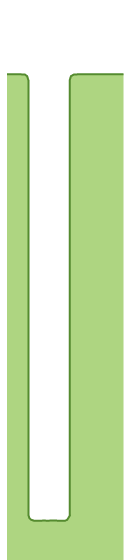

In [9]:
# NBVAL_IGNORE_OUTPUT
out